In [0]:
import pandas as pd  
import numpy as np
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage,fcluster
from sklearn import metrics 
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
import plotly.figure_factory as ff

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Import the CSV file
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/FinalProject_ChicagoCrime/Merge_1.csv")
df.head()

,District,index,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Latitude,Longitude,p_dname,p_x,p_y,p_latitude,p_longitude,Distance,Time,Month,Day,Season,crimeGroups
0,4,2,JB528220,11/24/2018,095XX S STONY ISLAND AVE,0261,CRIM SEXUAL ASSAULT,AGGRAVATED: HANDGUN,ALLEY,1,0,431,7.0,51.0,02,1188521.0,1842119.0,41.721844,-87.585072,South Chicago,1193131.299,1837090.265,41.707933,-87.568349,6822.245420,08:45:00,11,24,Autumn,1
1,22,3,JB495848,08/27/2018,092XX S UNION AVE,1120,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,1,0,2223,21.0,73.0,10,1173264.0,1843551.0,41.726124,-87.640913,Morgan Park,1165825.476,1830851.333,41.691435,-87.668520,14717.784521,12:00:00,8,27,Summer,3
2,7,5,JB505888,09/27/2018,068XX S PERRY AVE,1020,ARSON,BY FIRE,VEHICLE NON-COMMERCIAL,1,0,722,6.0,69.0,09,1176575.0,1859723.0,41.770428,-87.628300,Englewood,1167659.235,1863005.522,41.779632,-87.660887,9500.832396,10:30:00,9,27,Autumn,2
3,24,6,JB472665,10/12/2018,061XX N BROADWAY,0890,THEFT,FROM BUILDING,COMMERCIAL / BUSINESS OFFICE,1,0,2433,48.0,77.0,06,1167199.0,1940579.0,41.992509,-87.660344,Rogers Park,1164193.588,1943199.401,41.999763,-87.671324,3987.355350,12:04:00,10,12,Autumn,2
4,8,9,JB241744,04/27/2018,070XX S CALIFORNIA AVE,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,APARTMENT,0,1,831,17.0,66.0,17,1158921.0,1857929.0,41.765884,-87.693061,Chicago Lawn,1154575.242,1862672.049,41.778987,-87.708864,6432.894093,02:45:00,4,27,Spring,1


In [6]:
df['ArrestLabel']=df['Arrest']
df.head()

,District,index,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Latitude,Longitude,p_dname,p_x,p_y,p_latitude,p_longitude,Distance,Time,Month,Day,Season,crimeGroups,ArrestLabel
0,4,2,JB528220,11/24/2018,095XX S STONY ISLAND AVE,0261,CRIM SEXUAL ASSAULT,AGGRAVATED: HANDGUN,ALLEY,1,0,431,7.0,51.0,02,1188521.0,1842119.0,41.721844,-87.585072,South Chicago,1193131.299,1837090.265,41.707933,-87.568349,6822.245420,08:45:00,11,24,Autumn,1,1
1,22,3,JB495848,08/27/2018,092XX S UNION AVE,1120,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,1,0,2223,21.0,73.0,10,1173264.0,1843551.0,41.726124,-87.640913,Morgan Park,1165825.476,1830851.333,41.691435,-87.668520,14717.784521,12:00:00,8,27,Summer,3,1
2,7,5,JB505888,09/27/2018,068XX S PERRY AVE,1020,ARSON,BY FIRE,VEHICLE NON-COMMERCIAL,1,0,722,6.0,69.0,09,1176575.0,1859723.0,41.770428,-87.628300,Englewood,1167659.235,1863005.522,41.779632,-87.660887,9500.832396,10:30:00,9,27,Autumn,2,1
3,24,6,JB472665,10/12/2018,061XX N BROADWAY,0890,THEFT,FROM BUILDING,COMMERCIAL / BUSINESS OFFICE,1,0,2433,48.0,77.0,06,1167199.0,1940579.0,41.992509,-87.660344,Rogers Park,1164193.588,1943199.401,41.999763,-87.671324,3987.355350,12:04:00,10,12,Autumn,2,1
4,8,9,JB241744,04/27/2018,070XX S CALIFORNIA AVE,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,APARTMENT,0,1,831,17.0,66.0,17,1158921.0,1857929.0,41.765884,-87.693061,Chicago Lawn,1154575.242,1862672.049,41.778987,-87.708864,6432.894093,02:45:00,4,27,Spring,1,0


In [7]:
#Dropping column
df=df.drop(columns=['Arrest'])
df.rename(columns={'ArrestLabel':'Arrest'},inplace=True)
df.head()

,District,index,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Domestic,Beat,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Latitude,Longitude,p_dname,p_x,p_y,p_latitude,p_longitude,Distance,Time,Month,Day,Season,crimeGroups,Arrest
0,4,2,JB528220,11/24/2018,095XX S STONY ISLAND AVE,0261,CRIM SEXUAL ASSAULT,AGGRAVATED: HANDGUN,ALLEY,0,431,7.0,51.0,02,1188521.0,1842119.0,41.721844,-87.585072,South Chicago,1193131.299,1837090.265,41.707933,-87.568349,6822.245420,08:45:00,11,24,Autumn,1,1
1,22,3,JB495848,08/27/2018,092XX S UNION AVE,1120,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,0,2223,21.0,73.0,10,1173264.0,1843551.0,41.726124,-87.640913,Morgan Park,1165825.476,1830851.333,41.691435,-87.668520,14717.784521,12:00:00,8,27,Summer,3,1
2,7,5,JB505888,09/27/2018,068XX S PERRY AVE,1020,ARSON,BY FIRE,VEHICLE NON-COMMERCIAL,0,722,6.0,69.0,09,1176575.0,1859723.0,41.770428,-87.628300,Englewood,1167659.235,1863005.522,41.779632,-87.660887,9500.832396,10:30:00,9,27,Autumn,2,1
3,24,6,JB472665,10/12/2018,061XX N BROADWAY,0890,THEFT,FROM BUILDING,COMMERCIAL / BUSINESS OFFICE,0,2433,48.0,77.0,06,1167199.0,1940579.0,41.992509,-87.660344,Rogers Park,1164193.588,1943199.401,41.999763,-87.671324,3987.355350,12:04:00,10,12,Autumn,2,1
4,8,9,JB241744,04/27/2018,070XX S CALIFORNIA AVE,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,APARTMENT,1,831,17.0,66.0,17,1158921.0,1857929.0,41.765884,-87.693061,Chicago Lawn,1154575.242,1862672.049,41.778987,-87.708864,6432.894093,02:45:00,4,27,Spring,1,0


In [0]:
df=df.drop(columns=['Beat','Ward','Latitude','Longitude','p_x','p_y','p_latitude','p_longitude','Case Number','Block','FBI Code','Date','p_dname','Primary Type','Season'])
df=df.drop(columns=["Description","Location Description","Domestic","Community Area","X Coordinate","Y Coordinate","Month","Day"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485344 entries, 0 to 485343
Data columns (total 7 columns):
District       485344 non-null int64
index          485344 non-null int64
IUCR           485344 non-null object
Distance       485344 non-null float64
Time           485344 non-null object
crimeGroups    485344 non-null int64
Arrest         485344 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 25.9+ MB


In [10]:
#making dummy variables out of the object variables 
#df_dum= pd.get_dummies(df)
#df_dum.head()
#data['Ntime'] = (data['seconds'] - data['seconds'].min())/(data['seconds'].max()-data['seconds'].min())
df['IUCR Cat']=df['IUCR'].astype("category").cat.codes
X = df.drop(columns=["crimeGroups","Arrest","IUCR","Time"])
y = df[["crimeGroups"]]
print(X.shape, y.shape)

(485344, 4) (485344, 1)


In [11]:
X.head

<bound method NDFrame.head of         District   index      Distance  IUCR Cat
0              4       2   6822.245420         2
1             22       3  14717.784521       103
2              7       5   9500.832396        97
3             24       6   3987.355350        84
4              8       9   6432.894093       177
...          ...     ...           ...       ...
485339         8  224407   7287.873953       101
485340         7  224408   4288.521873       101
485341         7  224409   1541.306056       101
485342         5  224410   6056.942572       101
485343         6  224411   2708.275085       101

[485344 rows x 4 columns]>

In [12]:
y['crimeGroups'].unique()

array([1, 3, 2, 4, 5])

In [0]:
#Dividing the data into Train and Test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [0]:
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)

In [20]:
X_scaled[0:1]

array([[ 0.83953522, -1.02231969, -1.03376793, -0.58829716]])

In [0]:
clustering = KMeans(n_clusters = 5, init = 'k-means++', n_init = 20,random_state=0).fit(X_scaled)
clusters = clustering.labels_

In [22]:
clusters[0:5]

array([1, 3, 2, 4, 3], dtype=int32)

In [0]:
X_train['clusters'] = clusters - 1

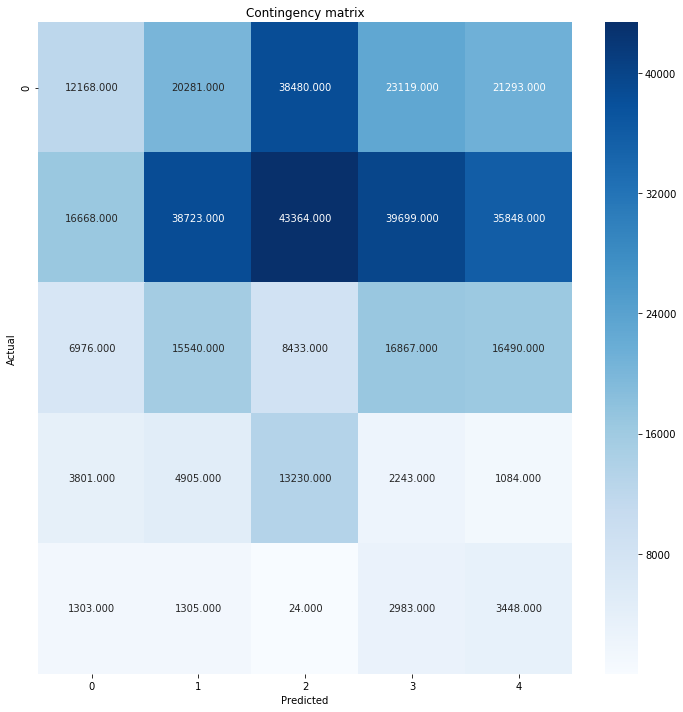

In [24]:
cont_matrix = metrics.cluster.contingency_matrix(y_train,X_train['clusters'])
fig, ax = plt.subplots(figsize=(10,10))  
ax=sns.heatmap(cont_matrix, yticklabels=5, annot = True, fmt = ".3f", square = False, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [25]:
X_train['clusters'].shape

(388275,)

In [0]:
Y=np.squeeze(y_train)

In [37]:
adjusted_rand_index = metrics.adjusted_rand_score(Y, X_train['clusters'])
silhouette_coefficient = metrics.silhouette_score(X_scaled, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[0.01099136342906424, 0.22473666853860663]


In [0]:
clustering = KMeans(n_clusters = 5, init = 'random', n_init = 10,random_state=0).fit(X_scaled)
clusters = clustering.labels_

In [0]:
clusters[0:5]

array([2, 1, 0, 3, 1], dtype=int32)

In [0]:
X_train['clusters'] = clusters - 1

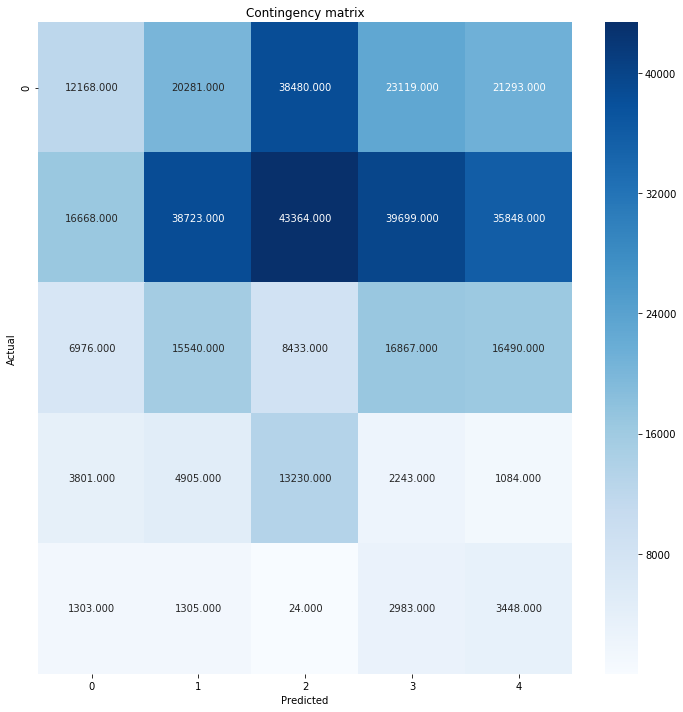

In [43]:
cont_matrix = metrics.cluster.contingency_matrix(y_train,X_train['clusters'])
fig, ax = plt.subplots(figsize=(10,10))  
ax=sns.heatmap(cont_matrix, yticklabels=5, annot = True, fmt = ".3f", square = False, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [0]:
X_train['clusters'].shape

(388275,)

In [0]:
Y=np.squeeze(y_train)

In [0]:
adjusted_rand_index = metrics.adjusted_rand_score(Y, X_train['clusters'])
silhouette_coefficient = metrics.silhouette_score(X_scaled, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[0.01127587904198441, 0.22532772840833132]


In [0]:
kmeans = pd.DataFrame(clusters)

In [32]:
kmeans[0]

0         1
1         3
2         2
3         4
4         3
         ..
388270    2
388271    0
388272    3
388273    2
388274    2
Name: 0, Length: 388275, dtype: int32

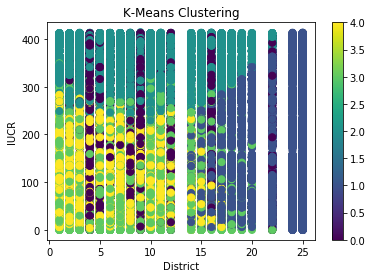

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(X_train['District'],X_train['IUCR Cat'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('District')
ax.set_ylabel('IUCR')
plt.colorbar(scatter)

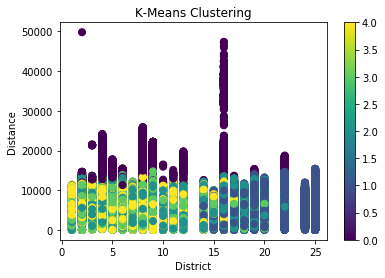

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(X_train['District'],X_train['Distance'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('District')
ax.set_ylabel('Distance')
plt.colorbar(scatter)

In [0]:
clustering = DBSCAN(eps = 5, min_samples = 7, metric = "euclidean").fit(X_scaled)
clusters = clustering.labels_

In [0]:
cont_matrix = metrics.cluster.contingency_matrix(ytrain,clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Greens)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [0]:
adjusted_rand_index = metrics.adjusted_rand_score(ytrain, clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaled, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])